In [13]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [14]:
# Reading data from remote link
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)

df.sample(10)

,Hours,Scores
18,6.1,67
2,3.2,27
22,3.8,35
24,7.8,86
3,8.5,75
17,1.9,24
21,4.8,54
13,3.3,42
12,4.5,41
11,5.9,62


Data Visualization

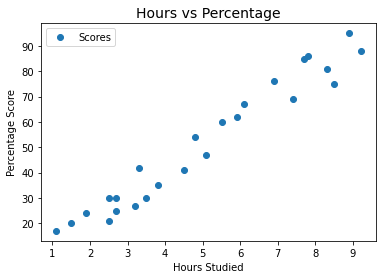

In [19]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage', fontsize=14)  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### **Data Preparation**

In [4]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

Now we will split this data into training and test sets. 

In [53]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=1) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [54]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression()

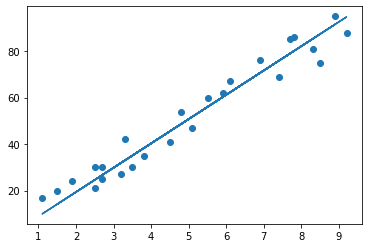

In [55]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [56]:
# print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

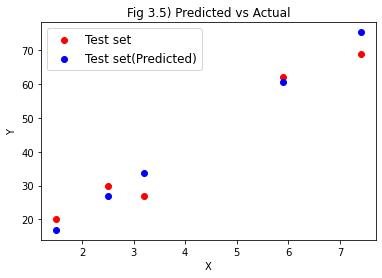

In [24]:
plt.scatter(X_test,y_test, color='red')
plt.scatter(X_test,y_pred, color='blue')
plt.title('Predicted vs Actual')
plt.legend(['Test set','Test set(Predicted)'], fontsize=12)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


In [26]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


What will be predicted score if a student studies for 9.25 hrs/ day?

In [61]:
print("predicted score if a student studies for 9.25 hrs/ day is" , regressor.predict([[9.5]]))

predicted score if a student studies for 9.25 hrs/ day is [97.84357146]


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [27]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


In [31]:
from sklearn.metrics import r2_score
print("R2 Score:", r2_score(y_test,y_pred))

R2 Score: 0.9454906892105355
